In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

import tensorflow as tf
from keras_preprocessing.image import ImageDataGenerator
import os


In [2]:
path = 'kaggle/input'


In [3]:
batch_size = 100

train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2,
                                   rotation_range=40, horizontal_flip=True,
                                   fill_mode='nearest')

train_gen = train_datagen.flow_from_directory(path, target_size=(150,150),
                    class_mode='categorical', batch_size=batch_size, 
                                              subset='training')

val_gen = train_datagen.flow_from_directory(path, target_size=(150,150),
                class_mode='categorical', batch_size=batch_size,
                                            subset='validation')

Found 3561 images belonging to 6 classes.
Found 888 images belonging to 6 classes.


TypeError: object of type 'bool' has no len()

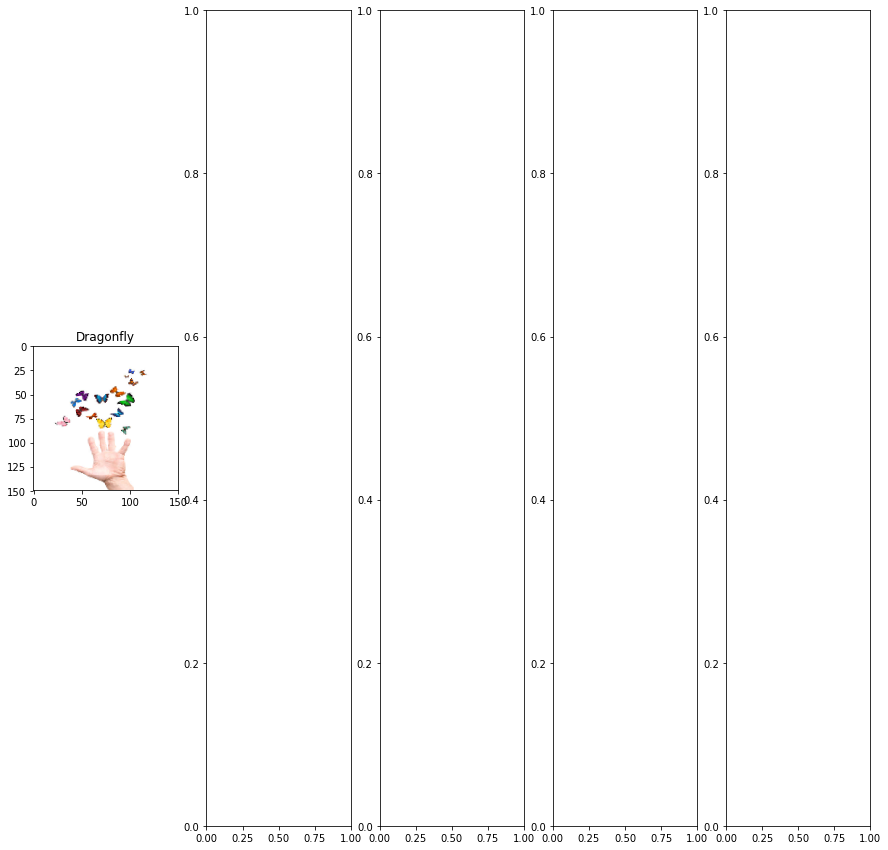

In [5]:
labels = ['Butterfly', 'Dragonfly', 'Grasshopper', 'Ladybird', 'Mosquito']
for i in range(15):
    if i%5==0:
        fig, ax = plt.subplots(ncols=5, figsize=(15,15))
    img, lbl = train_gen.next()
    ax[i%5].imshow(img[2])
    ax[i%5].set_title(labels[np.argmax(lbl[2])])
    ax[i%5].grid(False)
    ax[i%5].axis(False)

In [6]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu',
                input_shape=(150, 150, 3), padding='same'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(0.3),
    
    
    tf.keras.layers.Conv2D(64, (3,3), activation='relu',
                input_shape=(150, 150, 3), padding='same'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(0.3),
    
    tf.keras.layers.Conv2D(128, (3,3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(0.3),
    
    tf.keras.layers.Conv2D(256, (3,3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(0.3),
    
    tf.keras.layers.Conv2D(512, (3,3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(0.3),
        
    tf.keras.layers.Conv2D(512, (3,3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(0.3),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.Dropout(0.5),

    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    
    tf.keras.layers.Dense(5, activation='softmax')     
])

model.compile(loss = 'categorical_crossentropy', optimizer='adam', 
              metrics=['accuracy'])

In [7]:
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 150, 150, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 75, 75, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 75, 75, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 75, 75, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 37, 37, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 37, 37, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 37, 37, 128)       7

In [11]:
steps, val_steps = train_gen.n/batch_size, val_gen.n/batch_size
num_epochs = 100